<a href="https://colab.research.google.com/github/avineses/PUC_DBDC/blob/main/Evaluacion_final_v9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Control 3
Nombre 1: _Belén Quezada_                                                                                                                                      <br> 
Nombre 2: _Álvaro Vineses_   

# Instrucciones

El siguiente test podrá desarrollarlo de manera individual o en pareja con otro(a) de sus compañeros(as).<br>

Lea atentamente cada una de las preguntas propuestas y sea claro en los comentarios (si es que los incluye) de los desarrollos de sus respuestas. Para el desarrollo de las mismas, dispone de celdas de código después de cada pregunta. Sin embargo podrá agregar más celdas si así lo estima conveniente.<br>
Las preguntas formuladas en este test pueden ser abordadas con las herramientas trabajadas en clases, sin embaro, usted podrá hacer uso de las funcionalidades y/o packages que estime convenientes, a menos que se indique explícitamente lo contrario.

## Tiempo y entrega
Dispondrán hasta el día sábado **4 de junio** hasta las 23:59 hrs para hacer envío de sus respuestas.
Una vez finalizado el desarrollo del test, deberá entregarlo teniendo en cuenta las siguientes consideraciones :

 * Descargue el notebook en **formato `*.ipynb`** (uno por pareja), e indique en el nombre del archivo los nombres de los integrantes, `Control3_nombres_integrantes.ipynb`. 
 
 * En caso de trabajar en Rstudio, deberá enviar el script de extensión `*.R` con el siguiente nombre: `Control3_nombres_integrantes.R` , **procurando indicar con comentarios claros, qué pregunta está respondiendo en cada caso**.
 * Envíe el archivo al correo rumorale1@gmail.com, con copia a majorquev@gmail.com con el asunto "DBDC-R-C3: 'nombre y apellido de los integrantes' "
 
**NOTA**: 
   * Los correos cuyo asunto no comiencen con "DBDC-R-C3" no llegarán a destino y por ende no serán calificados.
   * Los archivos que no contengan nombre serán calificados con la nota mínima 1.0.
   * Los correos enviados posterior a la fecha y hora de entrega indicados tendrán una penalización de 1 punto por día (o fracción) de retraso en la entrega, por ejemplo, si usted envía sus respuestas a las 00:05 hrs del domingo 05 de junio, su nota máxima será un 6.0.

# Sección 1
## Introducción
En esta seción usted generará un breve anáisis descriptivo de la evolución de la expectativa de vida de diferentes países. Para ello usted utilizará la información disponible en el dataset `gapminder` del package del mismo nombre. La información contenida en este dataset corresponde a la siguiente:
        
   * **country:** Factor con 142 niveles

   * **continent:** Factor con 5 niveles

   * **year:** Rangos de años desde 1952 to 2007 en incrementos de  5 años

   * **lifeExp:** Esperanza de vida al nacer, en años

   * **pop:** Población

   * **gdpPercap:** GDP per capita (US$, ajustado por inflación)

In [ ]:
install.packages('gapminder')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
options(repr.plot.width = 12, repr.plot.height = 6)
library(gapminder)
data(gapminder)
head(gapminder)

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


**P1) (2pts)** El siguiente representa la relación entre el el ingreso GDP y la esperanza de vida para **todos los países** a lo largo de **todos los años**, adicionalmente el tamaño de cada punto está en proporción con la poblción total de cada país. Adicionalmente, el color varía en función del año del registro.
En el gráfico se pueden apreciar observaciones con alto GDP (aquellas encerradas en el recuadro rojo). Identifíque dichas observaciones e indique claramente a qué país(es) y año(s) corresponden. 

NOTA: Usted tiene libertad de escoger el método con el cual identificar dichas observaciones.



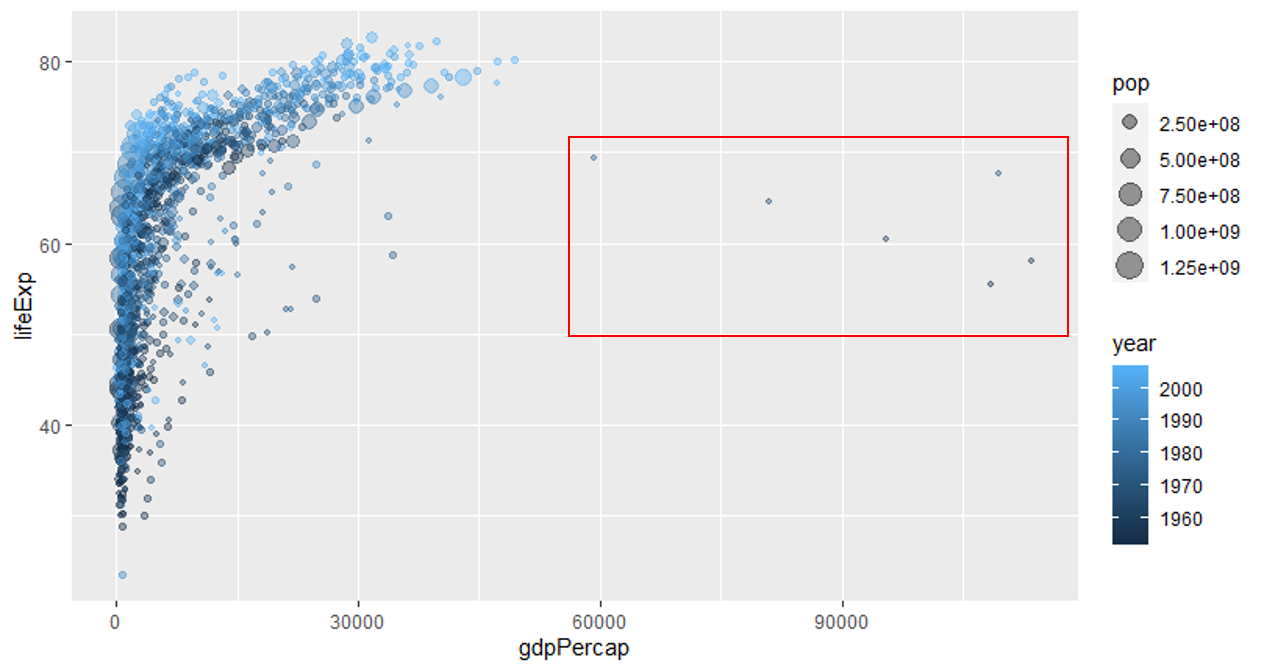

In [ ]:
# P1 --------------------------------------------------
library(dplyr)
p1<- gapminder %>% filter(gdpPercap >= 59000) %>% select(1,3,6)
p1

# Respuesta: Corresponde al país Kuwait en los años 1952, 1957, 1962, 1967, 1972 y 1977.



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




country,year,gdpPercap
<fct>,<int>,<dbl>
Kuwait,1952,108382.35
Kuwait,1957,113523.13
Kuwait,1962,95458.11
Kuwait,1967,80894.88
Kuwait,1972,109347.87
Kuwait,1977,59265.48


**P2) (3pts)** Mediante un gráfico de puntos, visualice una comparativa entre la relación de ingresos y expectativa de vida, para los ños 1052 y 2007. Para ello usted deberá replicar el siguiente gráfico, donde el color representa a un continente distinto y el tamaño está dado por el total de población. 

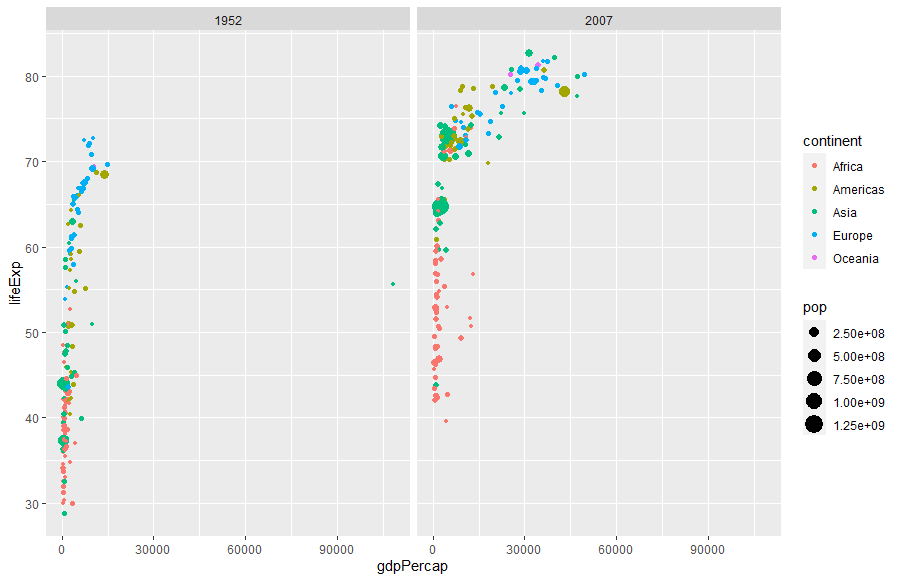

In [ ]:
library(ggplot2)

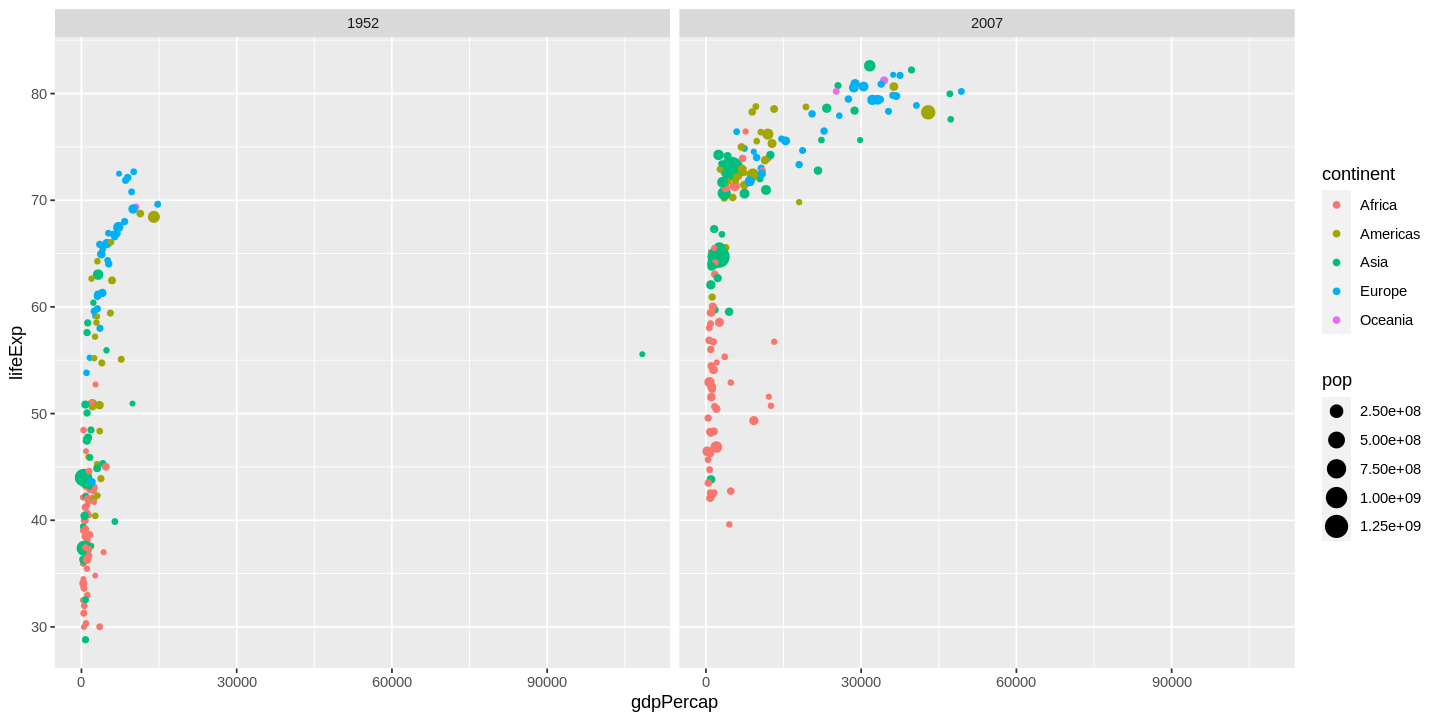

In [ ]:
# P2 --------------------------------------------------
p2 <- gapminder %>% filter(year == 1952 | year == 2007)

p2 %>% ggplot() +
        aes(x = gdpPercap,y = lifeExp, size = pop, color = continent)+
        geom_point() + 
        facet_wrap(~ year )
# Respuesta:

In [ ]:
names(gapminder)
class(gapminder$year)

[1] "country"   "continent" "year"      "lifeExp"   "pop"       "gdpPercap"

[1] "integer"

**P3) (2pts)** Determine el nivel de correlación de **spearman**, entre las variables `gdpPercap` y `lifeExp` para cada uno de los años registrados. ¿En qué año se observa el mayor nivel de correlación entre ambas variables?

In [ ]:
# P3 --------------------------------------------------
p3 <- gapminder %>% group_by(year) %>% 
                    summarise(c_spearman = cor(gdpPercap,lifeExp, method = "spearman")) %>% 
                    filter(c_spearman == max(c_spearman))
p3

# Respuesta: Se observa el mayor nivel de correlación entre ambas variables en el año 1992.

year,c_spearman
<int>,<dbl>
1992,0.8972412


**P4)** Para el año obtenido en la pregunta anterior, realice una breve descrición de la distribución de la expectativa de vida `lifeExp`. E indique lo siguiente

   **a) (1pt)** ¿Cuál fue la esperanza de vida promedio considerando todos los países registrados?<br>
   **b) (1pt)** ¿Cuál es el país que en dicho año tuvo la mayor esperanza de vida?<br>

 


In [ ]:
names(gapminder)

[1] "country"   "continent" "year"      "lifeExp"   "pop"       "gdpPercap"

In [ ]:
install.packages('quantmod')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘zoo’, ‘TTR’




   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  23.60   56.12   67.70   64.16   72.58   79.36 

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘xts’


The following objects are masked from ‘package:dplyr’:

    first, last


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



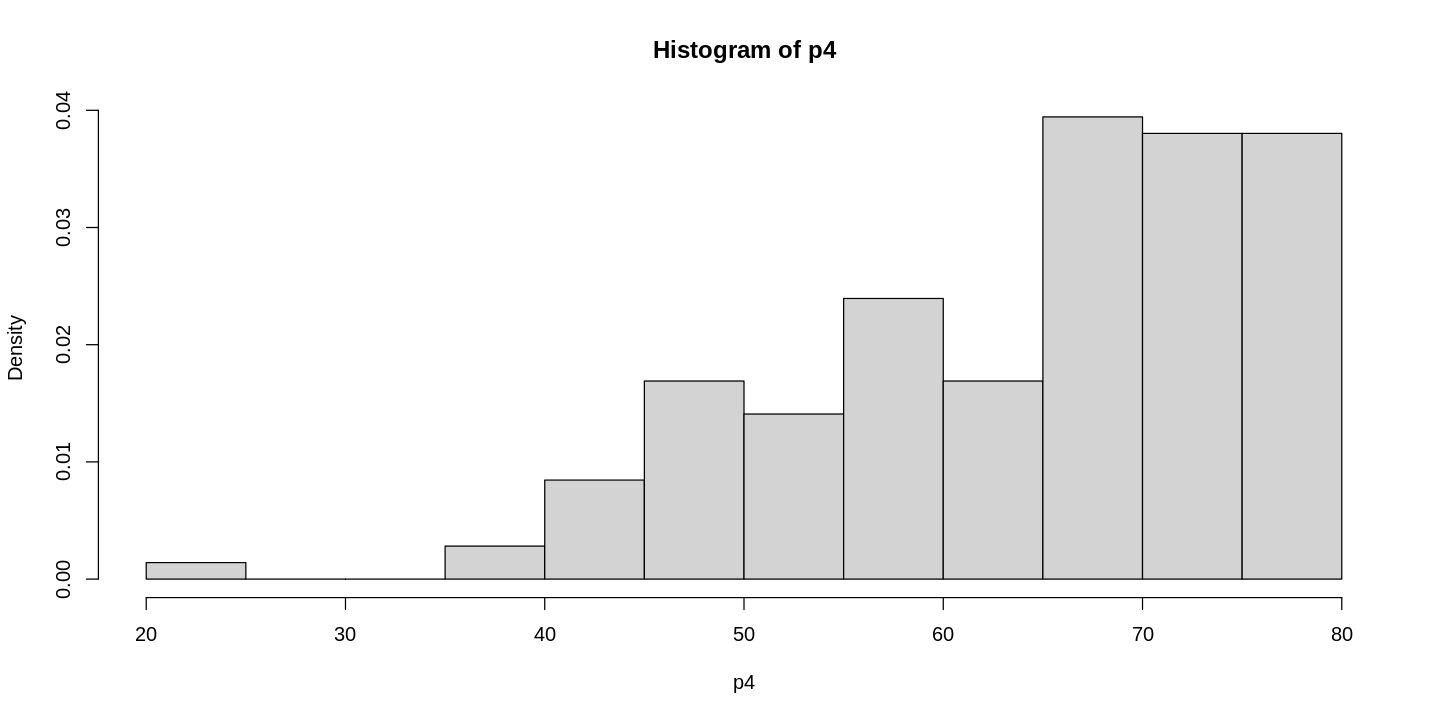

In [ ]:
# Pre P4 --------------------------------------------------
p4 <- gapminder %>% filter(year == 1992) %>% select(lifeExp)
p4 <- p4$lifeExp
summary(p4)
hist(p4,freq = F)
library('quantmod') # debe instalarla de ser necesario                 

In [ ]:
# P4) 
# a) Esperanza de vida promedio
p4a <- mean(p4)
p4a

#Respuesta: La esperanza de vida para el año 1992 es 64 años aproximadamente. 

[1] 64.16034

In [ ]:
names(gapminder)

[1] "country"   "continent" "year"      "lifeExp"   "pop"       "gdpPercap"

In [ ]:
# P4)
# b) 
p4b <- gapminder %>% filter(year == 1992)
p4b <- p4b %>% select(country,lifeExp) %>% filter(lifeExp == max(lifeExp))
p4b

#Respuesta: El país que en el año 1992 tuvo la mayor esperanza de vida fue Japón con un promedio de 79.36 años.

country,lifeExp
<fct>,<dbl>
Japan,79.36


## En busca de la normalidad

Se sabe que una manera de estabilizar la variabilidad presente en una variable, es estudiando su logaritmo. A continuación usted deberá estudiar el comportamiento ddistribucional del loagritmo de la expectativa de vida.


**P5)** Considerando todos los años de observación, determine lo sguiente:

  **a) (2pts)**  Mediante el test de shapiro, indique los dos continentes que presentan un comportamiento normal en la distribución del logaritmo de `lifeExp`. <br>
  **b) (3pts)** Para los continentes encontrados en **a)**, grafique los histogramas para el logaritmo de `lifeExp`. Considere añadir estimaciones de las densidades, dadas por geom_density así como una densidad normal con parámetros de media y vrianza igual a la media y desviación estandar muestral. ¿Qué opina sobre el histograma de Oceanía? Comente sobre posibles causas de su aspecto.<br>
  **c) (2pts)** Complemente lo anterior, visualizando los qqplots para el logarimo de `lifeExp`.  Considere la utilización de las funciones `qqnorm()` y `qqline()` para el contraste contra una distribución normal.

In [ ]:
# P5 --------------------------------------------------
#a) 
P5a_Asia <- gapminder %>% 
            select(continent, lifeExp) %>%
            filter(continent == "Asia") %>%
            mutate(lifeExp_Log = log(lifeExp))  

shapiro.test(P5a_Asia$lifeExp_Log)                                    




	Shapiro-Wilk normality test

data:  P5a_Asia$lifeExp_Log
W = 0.94009, p-value = 1.517e-11


In [ ]:
P5a_Europe <- gapminder %>% 
            select(continent, lifeExp) %>%
            filter(continent == "Europe") %>%
            mutate(lifeExp_Log = log(lifeExp))

shapiro.test(P5a_Europe$lifeExp_Log)                                    



	Shapiro-Wilk normality test

data:  P5a_Europe$lifeExp_Log
W = 0.88193, p-value = 5.283e-16


In [ ]:

P5a_Africa <- gapminder %>% 
            select(continent, lifeExp) %>%
            filter(continent == "Africa") %>%         
            mutate(lifeExp_Log = log(lifeExp))
P5a_Africa  
log(54)          
shapiro.test(P5a_Africa$lifeExp_Log)                                    


continent,lifeExp,lifeExp_Log
<fct>,<dbl>,<dbl>
Africa,43.077,3.762989
Africa,45.685,3.821770
Africa,48.303,3.877494
Africa,51.407,3.939774
Africa,54.518,3.998531
Africa,58.014,4.060684
Africa,61.368,4.116889
Africa,65.799,4.186605
Africa,67.744,4.215736


[1] 3.988984


	Shapiro-Wilk normality test

data:  P5a_Africa$lifeExp_Log
W = 0.99603, p-value = 0.1171


In [ ]:
P5a_Americas <- gapminder %>% 
            select(continent, lifeExp) %>%
            filter(continent == "Americas") %>%
            mutate(lifeExp_Log = log(lifeExp))
shapiro.test(P5a_Americas$lifeExp_Log)                                    



	Shapiro-Wilk normality test

data:  P5a_Americas$lifeExp_Log
W = 0.90933, p-value = 1.819e-12


In [ ]:
P5a_Oceania <- gapminder %>% 
            select(continent, lifeExp) %>%
            filter(continent == "Oceania") %>%    
            mutate(lifeExp_Log = log(lifeExp))
shapiro.test(P5a_Oceania$lifeExp_Log)                                    



	Shapiro-Wilk normality test

data:  P5a_Oceania$lifeExp_Log
W = 0.92871, p-value = 0.09124


In [ ]:
# Respuesta 5a: De acuerdo a los p-values obtenidos con el Test de Shapiro, con un 5% de significancia sólo Africa y Oceania rechazan la hipotesis nula. 
#Por lo tanto, se podría asumir una distribución normal en la esperanza de vida logarítmica de esos continentes.


In [ ]:
#b) 
#hist(P5a_Africa$lifeExp_Log,freq = F)
#hist(P5a_Oceania$lifeExp_Log,freq = F)
#hist(P5a_Oceania$lifeExp,freq = F)

mean_log_africa <- mean(P5a_Africa$lifeExp_Log)
mean_log_africa
sd_log_africa <- sd(P5a_Africa$lifeExp_Log)
sd_log_africa

mean_log_oceania <- mean(P5a_Oceania$lifeExp_Log)
mean_log_oceania
sd_log_oceania <- sd(P5a_Oceania$lifeExp_Log) 
sd_log_oceania


[1] 3.871931

[1] 0.185022

[1] 4.307228

[1] 0.05065203

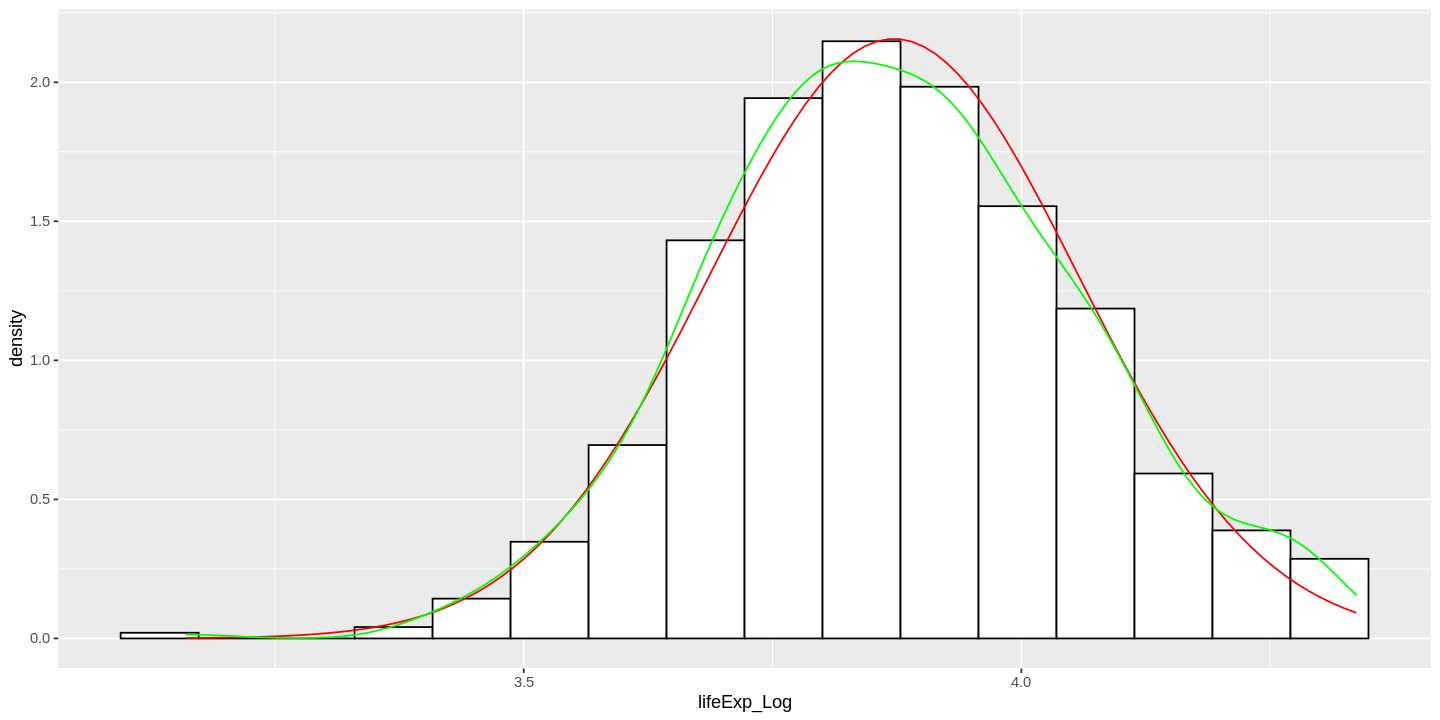

In [ ]:
P5a_Africa %>% 
  ggplot() + 
  aes(x = lifeExp_Log) +
  geom_histogram(
    bins = 16,
    fill = "white",
    color = "black",
    aes(y = ..density..)) +
  stat_function( fun = function(x){
    dnorm(x, mean = mean_log_africa, sd = sd_log_africa)
  },col = "red") +
  geom_density(col = "green")

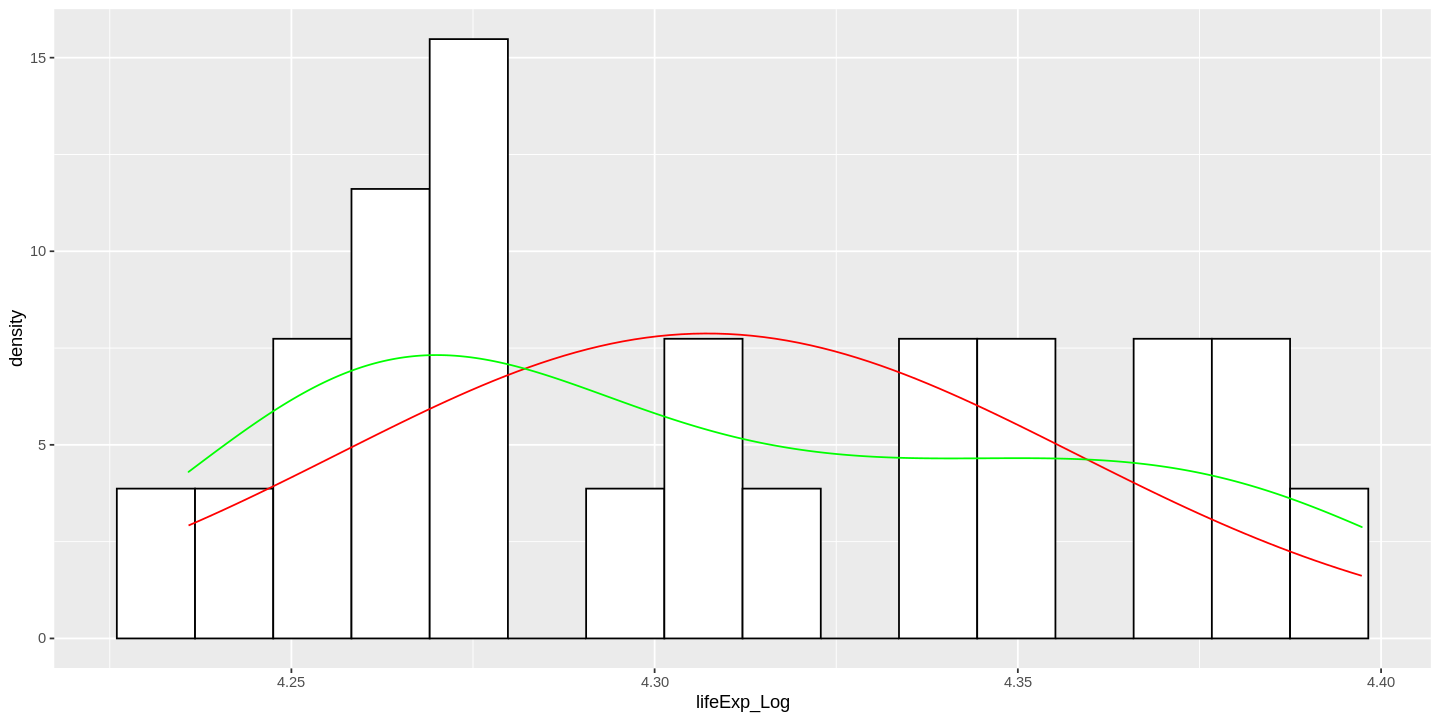

In [ ]:
P5a_Oceania %>% 
  ggplot() + 
  aes(x = lifeExp_Log) +
  geom_histogram(
    bins = 16,
    fill = "white",
    color = "black",
    aes(y = ..density..)) +
  stat_function( fun = function(x){
    dnorm(x, mean = mean_log_oceania, sd = sd_log_oceania)
  },col = "red") +
  geom_density(col = "green")

In [ ]:
#Respuesta 5b: La esperanza de vida de Oceanía, a pesar de aplicar logaritmo se puede observar que no sigue una distribución normal. 
#La frecuencia de los valores visualmente se divide en cuatro grupos donde se dividen por los espacios vacíos. 
#En el primer grupo de izquierda a derecha se puede observar que se concentra la mayoría de los datos.
#Una posible causa de su distribución podría ser debido a que las condiciones de vida en el continente oceánico son bastante heterogéneas y por tanto la esperanza de vida puede variar bastante entre los habitantes.


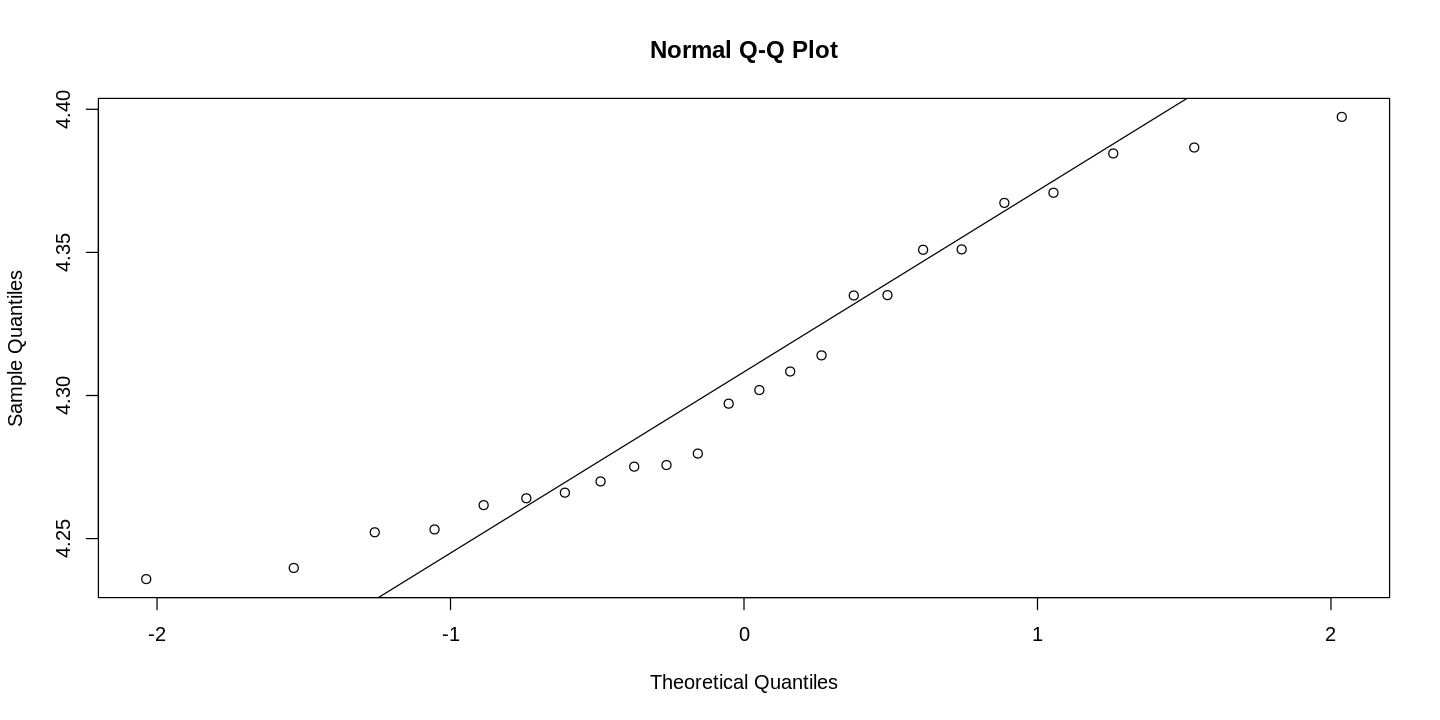

In [ ]:
#c)
# qqplot
qqnorm(P5a_Oceania$lifeExp_Log)
qqline(P5a_Oceania$lifeExp_Log)
#Respuesta 5c: Se observa un claro alejamiento de los puntos de la muestra de Oceanía versus la línea recta de normalidad, el cual es más evidente en las colas.

**P6) (3pts)** Considerando el continente de África, y asumiendo normalidad en el logaritmo de lifeExp. Independiente del año, ¿cuál es la probabilidad de que la **expectativa de vida** (`lifeExp`) sea superior a 54 años?



In [ ]:
# P6 --------------------------------------------------
# Primero realizamos la obtención de indicadores estadísticos correspondientes:
summary(P5a_Africa$lifeExp_Log)
sd(P5a_Africa$lifeExp_Log)
mean(P5a_Africa$lifeExp_Log)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.161   3.746   3.867   3.872   3.997   4.337 

[1] 0.185022

[1] 3.871931

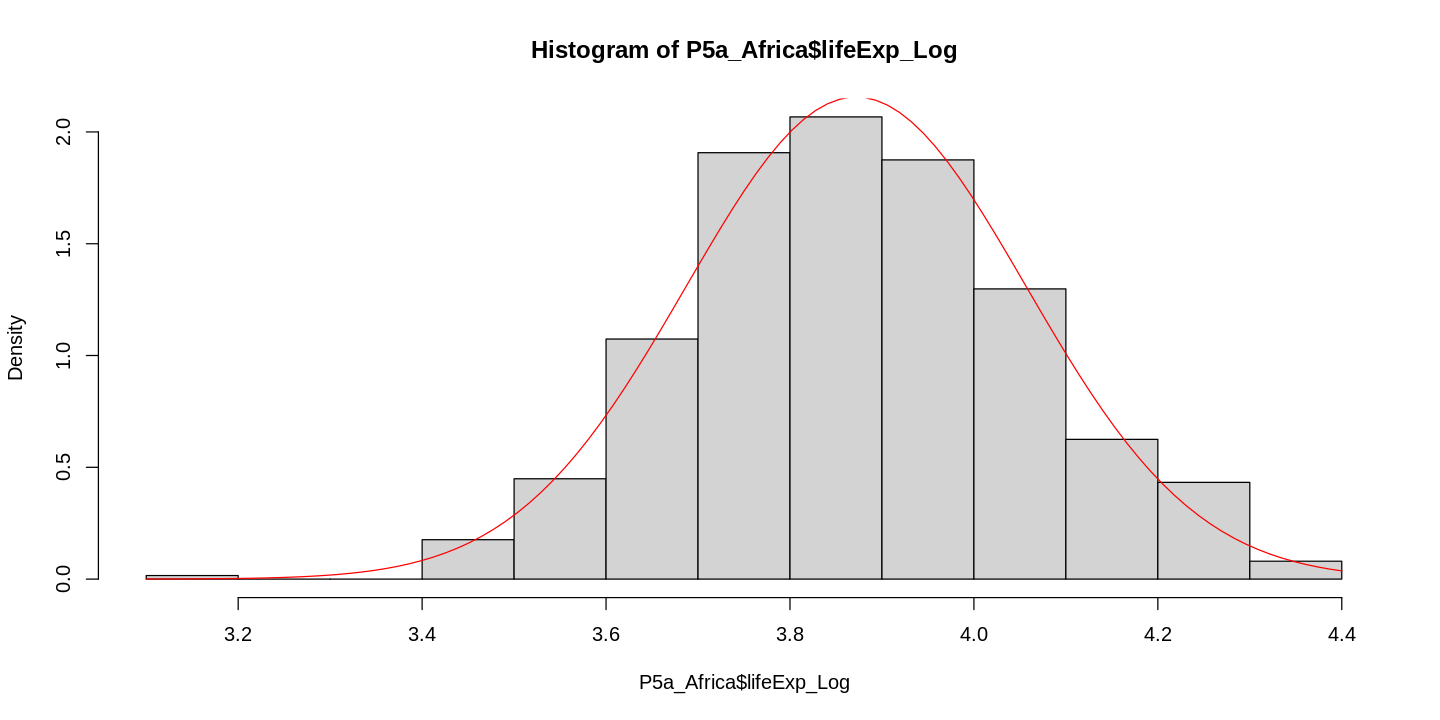

In [ ]:
hist(P5a_Africa$lifeExp_Log,freq = F)
curve(dnorm(x, mean = 3.87193087979551, sd = 0.185021973308212), add = T, col = "red")

In [ ]:
1- pnorm(log(54), mean = 3.87193087979551, sd = 0.185021973308212)
#Respuesta P6: La probabilidad de que la expectativa de vida sea superior a 54 años en África es de un 26,34% aproximadamente.

[1] 0.2634829

# Sección 2
## Cafetería
A usted se le solicita analizar las ventas de los distintos productos ofrecidos por una cafetería. Para ello usted deberá generar una descripción de dichas ventas,utilizando estadísticos descriptivos, gráficos  y además deberá incluir un análisis de la venta cruzada de los productos en cuestión. 

In [ ]:
install.packages("arules")
library(arules)
library(dplyr)
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



Attaching package: ‘arules’


The following object is masked from ‘package:dplyr’:

    recode


The following objects are masked from ‘package:base’:

    abbreviate, write




In [ ]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.7     ✔ purrr   0.3.4
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ xts::first()    masks dplyr::first()
✖ dplyr::lag()    masks stats::lag()
✖ xts::last()     masks dplyr::last()



El siguiente archivo ("cafeteria.csv") contiene los registros de las ventas de una cafetería en un determinado período.
Ustede deberá responder las siguientes preguntas con el objetivo de generar recomendaciones de ventas en distintos períodos de tiempo.

In [ ]:
# Cargando aquí el archivo "cafeteria.csv" 
cafeteria <- read.csv("https://raw.githubusercontent.com/majorquev/DBDC_202203_Programacion_en_R_para_ciencia_de_datos/main/Evaluaciones/C3/cafeteria.csv")
head(cafeteria)

,Date,Time,Transaction,Item
,<chr>,<chr>,<int>,<chr>
1,2016-10-30,09:58:11,1,Bread
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:05:34,2,Scandinavian
4,2016-10-30,10:07:57,3,Hot chocolate
5,2016-10-30,10:07:57,3,Jam
6,2016-10-30,10:07:57,3,Cookies


**P1) (2pts)** Genere tres nuevas columnas, que contengan la hora, minutos  y segundos de la transacción registrada.
A modo de referencia, su tabla debería contener al menos los siguientes campos (en la imagen se muestran sólo algunos registros de la tabla).

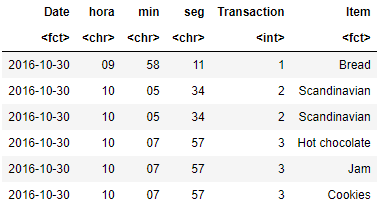

De ser de utilidad, puede consultar la documentación de las funciones substr y separate de los packages base y tidyr respectivamente.

In [ ]:
?substr

In [ ]:
# P1 --------------------------------------------------
P1a <- cafeteria %>%
        mutate(hora = substr(Time,1,2), min = substr(Time,4,5), seg = substr(Time,7,8)) %>% 
        select(Date, hora, min, seg, Transaction, Item) 
P1a       
# Respuesta:

Date,hora,min,seg,Transaction,Item
<chr>,<chr>,<chr>,<chr>,<int>,<chr>
2016-10-30,09,58,11,1,Bread
2016-10-30,10,05,34,2,Scandinavian
2016-10-30,10,05,34,2,Scandinavian
2016-10-30,10,07,57,3,Hot chocolate
2016-10-30,10,07,57,3,Jam
2016-10-30,10,07,57,3,Cookies
2016-10-30,10,08,41,4,Muffin
2016-10-30,10,13,03,5,Coffee
2016-10-30,10,13,03,5,Pastry


**P2) (4pts)**  Genere una tabla resumen que contenga la siguiente información.

* `hora`: Hora donde se registraron las transacciones. por ejemplo, el valor 09 indica el bloque horario comprendido entre las 09:00 y 09:59 hrs. 
* `total_trx` : total de transacciones distintas generadas en el bloque horario respectivo.
* `total_items`: total de items vendidos en el bloque horario respectivo.
* `total_items_unicos`: total de items únicos venidos en el bloque horario respectivo.


In [ ]:
# P2 --------------------------------------------------
#Supuesto: la columna Transaction muestra el identificador de una compra, por lo que se tomará como una transacción los valores únicos de éstos.

P2 <- P1a %>% group_by(hora) %>% summarise(total_trx=sum(n_distinct(Transaction)), 
                                           total_items= n(),
                                           total_items_unicos=sum(n_distinct(Item)))
# Tabla resumen
P2

hora,total_trx,total_items,total_items_unicos
<chr>,<int>,<int>,<int>
01,1,1,1
07,16,25,6
08,375,669,43
09,1007,2045,49
10,1267,2763,64
11,1445,3216,66
12,1347,3021,66
13,1163,2776,69
14,1130,2736,68


In [ ]:
names(P1a)

[1] "Date"        "hora"        "min"         "seg"         "Transaction"
[6] "Item"

**P3)** Con base en la tabla anterior, diremos que una hora pertenece al horario punta si la **cantidad de transacciones distintas** generadas en dicho bloque supera las 1000 transacciones. 

**a) (1pt)** ¿Qué horas comprende el horario punta?<br>
**b) (2pt)** En promedio, ¿cuántas transacciones distintas por hora se dieron en horario punta?¿y en horario no punta? 


In [ ]:
# P3a --------------------------------------------------
(P3a <- P2 %>% filter(total_trx >1000))
 # Respuesta: El horario punta comprende entre las 09 y 14 hrs.

hora,total_trx,total_items,total_items_unicos
<chr>,<int>,<int>,<int>
09,1007,2045,49
10,1267,2763,64
11,1445,3216,66
12,1347,3021,66
13,1163,2776,69
14,1130,2736,68


In [ ]:
# P3b --------------------------------------------------
P3b <- P2 %>% mutate(tipo_horario= case_when(total_trx > 1000 ~ "Horario punta",
                                              TRUE ~ "Horario no punta"))
P3b <- P3b %>% group_by(tipo_horario) %>% summarise( prom_total_trx = mean(total_trx) )
P3b
# Respuesta: En promedio, en horario punta se dan 1226 transacciones distintas, mientras que en horario no punta
# se observa en promedio 181 transacciones distintas.

tipo_horario,prom_total_trx
<chr>,<dbl>
Horario no punta,181.0
Horario punta,1226.5


**P4)** Se sabe que el total de personal disponible es capaz de atender como máximo, 1300 transacciones por hora, de modo que no se "sature" el sistema y que los tiempos de espera de los clientes sean razonables. Asumiendo que la cantidad de transacciones por hora tiene una distribución Poisson con parámetro $\lambda$ igual al estimado en la pregunta **3.b** (hora punta) responda lo siguiente:

**a) (2pt)** ¿Cuál es la probabilidad de que en horario punta se den **más de 1300** transacciones en una hora? ¿Cómo interpretaría este valor? Comente.<br>
**b) (1pt)** Con el objetivo de reducir costos, se propone limitar el personal disponible a modo de poder atender como máximo 1250 transacciones por hora. ¿Que tan probable es que se supere este máximo de transacciones por hora ? ¿Recomendaría usted esta medida? <br>
**c) (2pt)** Usted sugiere modificar la cantidad de personal pero teniendo en cuenta de que se garantice la atención de al menos un 95% de las transacciones por hora. ¿Cuántas transacciones por hora se deberían poder gestionar en este escenario?

In [ ]:
# P4 --------------------------------------------------
# P4a, a) (2pt) ¿Cuál es la probabilidad de que en horario punta se den más de 1300 transacciones en una hora? 
# ¿Cómo interpretaría este valor? Comente.
# En promedio, en una hora de horario peak la tasa de llegada de clientes es 1226 por cada una hora. 
# Lambda = 1226 [clientes/hora]
ppois(1300,lambda = 1226,lower.tail = F )
# Respuesta: Existe un 1,736% de probabilidad de superar las 1300 transacciones.


[1] 0.01736916

In [ ]:
# P4b, b) (1pt) Con el objetivo de reducir costos, se propone limitar el personal disponible a modo de poder atender 
# como máximo 1250 transacciones por hora. 
# ¿Que tan probable es que se supere este máximo de transacciones por hora ? ¿Recomendaría usted esta medida?

ppois(1250,lambda = 1226,lower.tail = F ) # pregunta

ppois(1275,lambda = 1226,lower.tail = F ) # Recomendación

# Respuesta: Existe un 24,126% de probabilidad de que se supere el máximo de transacciones propuesto.
# Se recomienda disponer de personal para atender a 1275 personas, ya que para ese caso existe un 7,94% de probabilidad
# de que lleguen más que esa cantidad.


[1] 0.2412935

[1] 0.07940559

In [ ]:
# P4c, (2pt) Usted sugiere modificar la cantidad de personal pero teniendo en cuenta de que se garantice la atención de al 
# menos un 95% de las transacciones por hora. 
#¿Cuántas transacciones por hora se deberían poder gestionar en este escenario?

qpois(0.95, lambda = 1226, lower.tail = TRUE, log.p = FALSE)

#Respuesta: Bajo el escenario expuesto, se debiesen poder gestionar un total de 1284 transacciones por hora.


[1] 1284

### Análisis de los productos vendidos.
Con el objetivo de aumentar las ventas, se le solicita a usted analizar los itmes y las ventas cruzadas entre los productos ofrecidos. Para ello usted guía su análisis en función de las siguientes preguntas.

**P5) (2pt)** ¿Cuáles son los 5 items más vendidos? Ilustre mediante un gráfico de barras o una tabla.

In [ ]:
# P5 --------------------------------------------------
# Respuesta
P5 <- P1a %>% group_by(Item) %>% 
              summarise(total_trx_distinct = sum(n_distinct(Transaction))) %>%
              arrange(desc(total_trx_distinct))
head(P5)              

Item,total_trx_distinct
<chr>,<int>
Coffee,4528
Bread,3097
Tea,1350
Cake,983
Pastry,815
NONE,753


**P6) (4pts)** ¿Cambian estos 5 ítems según el horario de atención? Para ello muestre los 5 items más vendidos en los siguientes horarios.

* 7:00-11:59
* 12:00-16:59
* 17:00-23:59

In [ ]:
# Se definirá lo siguiente:
# hora01: 7:00 - 11:59
# hora02: 12:00 - 16:59
# hora03: 17:00 - 23:59

P6 <- cafeteria %>% mutate(hora = substr(Time,1,2), min = substr(Time,4,5), seg = substr(Time,7,8))

P6 <- P6 %>% mutate(tipo_hora= case_when((hora=='07' | hora== '08' | hora=='09'|hora=='10'|hora=='11') ~ "hora01",
                                          (hora=='12' | hora=='13' | hora=='14'|hora=='15'|hora=='16') ~ "hora02",
                                          TRUE ~ 'hora03'))

P6 <- P6 %>% group_by(tipo_hora, Item) %>% summarise(q_item=n())
(P6_hora01 <- P6 %>% arrange(desc(q_item)) %>% filter(tipo_hora=="hora01") %>% head(5))
(P6_hora02 <- P6 %>% arrange(desc(q_item)) %>% filter(tipo_hora=="hora02") %>% head(5))
(P6_hora03 <- P6 %>% arrange(desc(q_item)) %>% filter(tipo_hora=="hora03") %>% head(5))



#Respuesta: Sí, efectivamente depende del rango de hora el top de ítems más vendidos. Por ejemplo:
# en el horario01: el top es Coffee, Bread, Pastry, Tea y Medialuna.
# en el horario02: el top es Coffee, Bread, Tea, Cake, Sandwich.
# en el horario03: el top es Coffee, Bread, Tea, Cake y Hot Chocolate.
# En síntesis, los que se mantienen siempre en los top 5 en todo horario son Coffee, Bread y Tea.

`summarise()` has grouped output by 'tipo_hora'. You can override using the
`.groups` argument.


tipo_hora,Item,q_item
<chr>,<chr>,<int>
hora01,Coffee,2561
hora01,Bread,1609
hora01,Pastry,604
hora01,Tea,456
hora01,Medialuna,402


tipo_hora,Item,q_item
<chr>,<chr>,<int>
hora02,Coffee,2823
hora02,Bread,1661
hora02,Tea,930
hora02,Cake,731
hora02,Sandwich,671


tipo_hora,Item,q_item
<chr>,<chr>,<int>
hora03,Coffee,87
hora03,Bread,55
hora03,Tea,49
hora03,Cake,30
hora03,Hot chocolate,23


### Genereación de reglas

**P7)** Considerando un **support mínimo de 0.02** , un  **confidence mínimo de 0.1** y teniendo en cuenta que **no se deben considerar reglas de asociación cuyo antecedente o consecuente sean vacíos**,

**a) (2pts)** ¿Cuál es la regla de asociación más frecuente en cada uno de los horarios indicados en **P6)**?<br>
**b) (2pts)** ¿Cuál es la regla de asociación con mayor confidence en cada uno de los horarios indicados en **P6)**? <br>
**c) (2pts)** ¿Cuál es la regla de asociación con mayor lift en cada uno de los horarios indicados en **P6)**? <br>

**NOTA:** En caso de no obtener reglas con los parámetros indicados, modifíquelos, pero tenga en consideración este hecho al momento de argumentar las preguntas posteriores.

In [ ]:
install.packages("reshape2")
library(arules)
library(reshape2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’



Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [ ]:
#Se realiza la categorización de P6 en la variable P7:
P7 <- cafeteria %>% mutate(hora = substr(Time,1,2), min = substr(Time,4,5), seg = substr(Time,7,8))
P7 <- P7 %>% mutate(tipo_hora= case_when((hora=='07' | hora== '08' | hora=='09'|hora=='10'|hora=='11') ~ "hora01",

                                          (hora=='12' | hora=='13' | hora=='14'|hora=='15'|hora=='16') ~ "hora02",

                                          TRUE ~ 'hora03'))

In [ ]:
#P7A
#Se segmenta primero según la "hora01":
P7_H1 <- P7 %>% filter(tipo_hora == "hora01") %>% 
                select(Item,Transaction)
P7_H1 

#Dicho Data Frame se transforma a un listado del tipo "transactions"
trans_H1 <- as(split(P7_H1[,"Item"], P7_H1[,"Transaction"]), "transactions")
inspect(trans_H1)

#Ahora calculamos los items frecuentes:
frequentItems_1 <- eclat(trans_H1, 
                        parameter = list(supp = 0.02)
                       ) # se calcula el support para items frecuentes
inspect(frequentItems_1)

Item,Transaction
<chr>,<int>
Bread,1
Scandinavian,2
Scandinavian,2
Hot chocolate,3
Jam,3
Cookies,3
Muffin,4
Coffee,5
Pastry,5


Warning message in asMethod(object):
“removing duplicated items in transactions”


Streaming output truncated to the last 5000 lines.
        Medialuna,                                   
        Tea}                                     3513
[1586] {Coffee}                                  3514
[1587] {Bread,                                       
        NONE,                                        
        Sandwich,                                    
        Tea}                                     3515
[1588] {Bread,                                       
        Medialuna,                                   
        Toast}                                   3516
[1589] {Medialuna,                                   
        Pastry}                                  3517
[1590] {Coffee}                                  3518
[1591] {Coffee,                                      
        NONE}                                    3519
[1592] {Coffee,                                      
        Pastry}                                  3520
[1593] {Cookies}               

In [ ]:
#Se segmenta ahora según la "hora02":
P7_H2 <- P7 %>% filter(tipo_hora == "hora02") %>% 
                select(Item,Transaction)
P7_H2 

#Dicho Data Frame se transforma a un listado del tipo "transactions"
trans_H2 <- as(split(P7_H2[,"Item"], P7_H2[,"Transaction"]), "transactions")
inspect(trans_H2)

#Ahora calculamos los items frecuentes:
frequentItems_2 <- eclat(trans_H2, 
                        parameter = list(supp = 0.02)
                       ) # se calcula el support para items frecuentes
inspect(frequentItems_2)

Item,Transaction
<chr>,<int>
Scandinavian,43
Fudge,43
Coffee,44
Medialuna,44
Coffee,45
Hot chocolate,45
Medialuna,45
Coffee,46
Ella's Kitchen Pouches,47


Warning message in asMethod(object):
“removing duplicated items in transactions”


Streaming output truncated to the last 5000 lines.
        Coffee}                                  5695
[2976] {Bread}                                   5696
[2977] {Baguette}                                5697
[2978] {Bread}                                   5698
[2979] {Coke,                                        
        Salad}                                   5699
[2980] {Bread}                                   5700
[2981] {Soup}                                    5701
[2982] {Coffee,                                      
        Sandwich}                                5702
[2983] {Brownie}                                 5703
[2984] {Bread}                                   5704
[2985] {Chicken Stew,                                
        Coke,                                        
        Juice}                                   5705
[2986] {Baguette}                                5706
[2987] {Coffee,                                      
        NONE,                  

In [ ]:
#Se segmenta finalmente según la "hora03":
P7_H3 <- P7 %>% filter(tipo_hora == "hora03") %>% 
                select(Item,Transaction)
P7_H3 

#Dicho Data Frame se transforma a un listado del tipo "transactions"
trans_H3 <- as(split(P7_H3[,"Item"], P7_H3[,"Transaction"]), "transactions")
inspect(trans_H3)

#Ahora calculamos los items frecuentes:
frequentItems_3 <- eclat(trans_H3, 
                        parameter = list(supp = 0.02)
                       ) # se calcula el support para items frecuentes
inspect(frequentItems_3)

Item,Transaction
<chr>,<int>
Bread,172
Coffee,172
Bread,173
Muffin,173
Coffee,174
Bread,175
Cookies,176
Coffee,176
Scandinavian,253


Warning message in asMethod(object):
“removing duplicated items in transactions”


      items                      transactionID
[1]   {Bread,                                 
       Coffee}                            172 
[2]   {Bread,                                 
       Muffin}                            173 
[3]   {Coffee}                            174 
[4]   {Bread}                             175 
[5]   {Coffee,                                
       Cookies}                           176 
[6]   {Scandinavian}                      253 
[7]   {Medialuna}                         254 
[8]   {Alfajores,                             
       Coffee}                            334 
[9]   {Fudge}                             335 
[10]  {Juice,                                 
       Mighty Protein}                    336 
[11]  {Alfajores,                             
       Coffee,                                
       Mineral water}                     337 
[12]  {Coffee,                                
       Mighty Protein}                    338 
[13]  {Alfajo

In [ ]:
#Respuesta P7A:La regla de asociación más frecuente es la compra solitaria de café en los 3 horarios segmentados con los siguientes valores de support:
#Horario 01 (07:00 a 11:59): 0.51411192
#Horario 02 (12:00 a 16:59): 0.45463377
#Horario 03 (17:00 a 23:59): 0.27372263
#Demostrando una clara mayor tasa de compra de dicha bebida durante la mañana (Horario 01).

In [ ]:
#P7B & P7C
#Ahora calculamos las reglas de asociación para H1:
rulesItems_1 <- apriori(trans_H1, 
                        parameter = list(supp = 0.02, conf = 0.1)
                       ) # se calcula el support para items frecuentes
inspect(rulesItems_1)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.1    0.1    1 none FALSE            TRUE       5    0.02      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 82 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[77 item(s), 4110 transaction(s)] done [0.00s].
sorting and recoding items ... [19 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [21 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
     lhs                rhs         support    confidence coverage   lift     
[1]  {}              => {Tea}       0.10729927 0.1072993  1.00000000 1.0000000
[2]  {}              => {Pastry}    0.13917275 0.1391727  1.00000000 1.0000000
[3]  {}              => {Bread}     0.36228710 0.3622

In [ ]:
#Ahora calculamos las reglas para H2:
rulesItems_2 <- apriori(trans_H2, 
                        parameter = list(supp = 0.02, conf = 0.1)
                       ) # se calcula el support para items frecuentes
inspect(rulesItems_2)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.1    0.1    1 none FALSE            TRUE       5    0.02      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 102 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[87 item(s), 5147 transaction(s)] done [0.00s].
sorting and recoding items ... [24 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [32 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
     lhs                rhs        support    confidence coverage   lift     
[1]  {}              => {Sandwich} 0.11462988 0.1146299  1.00000000 1.0000000
[2]  {}              => {Cake}     0.13522440 0.1352244  1.00000000 1.0000000
[3]  {}              => {Tea}      0.16786478 0.1678648

In [ ]:
#Ahora calculamos las reglas para H3:
rulesItems_3 <- apriori(trans_H3, 
                        parameter = list(supp = 0.02, conf = 0.1)
                       ) # se calcula el support para items frecuentes
inspect(rulesItems_3)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.1    0.1    1 none FALSE            TRUE       5    0.02      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 5 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[56 item(s), 274 transaction(s)] done [0.00s].
sorting and recoding items ... [24 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [29 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
     lhs                rhs             support    confidence coverage  
[1]  {}              => {Cake}          0.10218978 0.1021898  1.00000000
[2]  {}              => {Bread}         0.18978102 0.1897810  1.00000000
[3]  {}              => {Tea}           0.16423358 0.1642336  1.00000000


In [ ]:
#Respuesta P7B:La regla de asociación con mayor confidence en los 3 horarios segmentados son los siguientes valores:
#Horario 01 (07:00 a 11:59): Comprar un café dado que compré una tostada (confidence: 0.7205882)
#Horario 02 (12:00 a 16:59): Comprar un café dado que compré un pastry (confidence: 0.5258621)
#Horario 03 (17:00 a 23:59): Comprar una polera dado que compre una postal (confidence: 0.6000000 )

In [ ]:
#Respuesta P7C: La regla de asociación con mayor lift en los 3 horarios segmentados son las siguientes:
#Horario 01 (07:00 a 11:59): La probabilidad de que me lleve un café dado que compré una tostada aumenta en un 72,06% y viceversa.
#Horario 02 (12:00 a 16:59): La probabilidad de que me lleve un té dado que compré un producto no identificado (NONE) aumenta en un 149,95% y viceversa.
#Horario 03 (17:00 a 23:59): La probabilidad de que me lleve un chocolate caliente dado que compré un queque aumenta en un 266,88% y viceversa.

**P8)** Se quiere potenciar un segundo producto por la compra de un café en los tres horarios definidos previamente en **P6**.

**a) (3pts)** Genere tres listados (uno por cada rango horario) con todas las reglas que contengan el producto `Coffee` en el antecedente.<br>
**b) (2pts)** ¿Qué promoción recomendaría en cada horario por la compra de un café?. Justifique su respuesta basándose en los indicadores support, confidence y lift.


In [ ]:
# Respuesta P8A
## a) Si queremos buscar el listado que contenga al coffee como antecedente:
#Para horario H1:
Listado_Cafe_H1 <- apriori( data = trans_H1, 
                  parameter =list (supp=0.02,conf = 0.1, minlen = 2),
                  appearance = list(default="rhs", lhs ="Coffee"),
                  control = list (verbose=F)) 

class(Listado_Cafe_H1)
inspect(Listado_Cafe_H1)

#Para horario H2:
Listado_Cafe_H2 <- apriori( data = trans_H2, 
                  parameter =list (supp=0.02,conf = 0.1, minlen = 2),
                  appearance = list(default="rhs", lhs ="Coffee"),
                  control = list (verbose=F)) 

class(Listado_Cafe_H2)
inspect(Listado_Cafe_H2)

#Para horario H3:
Listado_Cafe_H3 <- apriori( data = trans_H3, 
                  parameter =list (supp=0.02,conf = 0.1, minlen = 2),
                  appearance = list(default="rhs", lhs ="Coffee"),
                  control = list (verbose=F)) 

class(Listado_Cafe_H3)
inspect(Listado_Cafe_H3)

[1] "rules"
attr(,"package")
[1] "arules"

    lhs         rhs         support    confidence coverage  lift      count
[1] {Coffee} => {Medialuna} 0.05450122 0.1060104  0.5141119 1.1465863 224  
[2] {Coffee} => {Pastry}    0.07712895 0.1500237  0.5141119 1.0779672 317  
[3] {Coffee} => {Bread}     0.09391727 0.1826787  0.5141119 0.5042373 386  


[1] "rules"
attr(,"package")
[1] "arules"

    lhs         rhs        support    confidence coverage  lift      count
[1] {Coffee} => {Sandwich} 0.06158928 0.1354701  0.4546338 1.1818043 317  
[2] {Coffee} => {Cake}     0.07110938 0.1564103  0.4546338 1.1566718 366  
[3] {Coffee} => {Tea}      0.05653779 0.1243590  0.4546338 0.7408283 291  
[4] {Coffee} => {Bread}    0.08898387 0.1957265  0.4546338 0.6474321 458  


[1] "rules"
attr(,"package")
[1] "arules"

    lhs         rhs             support    confidence coverage  lift      count
[1] {Coffee} => {Alfajores}     0.03284672 0.1200000  0.2737226 2.0550000  9   
[2] {Coffee} => {Hot chocolate} 0.03284672 0.1200000  0.2737226 1.4945455  9   
[3] {Coffee} => {Cookies}       0.03284672 0.1200000  0.2737226 1.6440000  9   
[4] {Coffee} => {Cake}          0.05839416 0.2133333  0.2737226 2.0876190 16   
[5] {Coffee} => {Bread}         0.02919708 0.1066667  0.2737226 0.5620513  8   
[6] {Coffee} => {Tea}           0.04744526 0.1733333  0.2737226 1.0554074 13   


In [ ]:
# Respuesta P8B
# La recomendación para aumentar la venta de café en cada horario sería:
#Horario 01 (07:00 a 11:59): Promoción de café con medialunas, debido a que su lift es el más alto de las 3 opciones (lift = 1.1465863).
#Horario 02 (12:00 a 16:59): Promoción de café con sándwich, debido a que su lift es el más alto de las 4 opciones (lift = 1.1818043).
#Horario 03 (17:00 a 23:59): Promoción de café con cake, debido a que su lift es el más alto de las 6 opciones (lift = 2.0876190).
